In [ ]:
# Importação das bibliotecas
# ---- Basics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# ---- Cronometrar o tempo do colab
import time

# ---- Pré-processamento
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
# ---- Possíveis Modelos utilizados

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, ElasticNet, ElasticNetCV, HuberRegressor, LassoLars, BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor


In [ ]:
# ---- Cálculo das Métricas
from sklearn import metrics


# Tirar o chato do Warning
import warnings
warnings.filterwarnings('ignore')



In [ ]:
df1 = pd.read_csv('features.csv')
df2 = pd.read_csv('stores.csv')
df4 = pd.read_csv('train.csv')

In [ ]:
display(df1.sample(3))

display(df2.sample(3))

display(df4.sample(3))

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
6533,36,2013-03-22,68.54,3.615,751.52,NaN,NaN,NaN,827.36,223.589514,6.266,False
3496,20,2010-10-29,57.56,2.921,NaN,NaN,NaN,NaN,NaN,205.111813,7.484,False
2032,12,2010-09-03,83.12,3.087,NaN,NaN,NaN,NaN,NaN,126.101935,14.180,False


,Store,Type,Size
27,28,A,206302
6,7,B,70713
16,17,B,93188


,Store,Dept,Date,Weekly_Sales,IsHoliday
119354,13,13,2010-09-17,46849.80,False
407796,44,28,2011-08-19,17.48,False
352766,37,92,2011-02-25,57942.40,False


In [ ]:
# Juntar os Dfs para montar a tabela final

df = df4.merge(df1, on=['Store','Date','IsHoliday']).sort_values(by=['Store','Date'])
df = df.merge(df2, on=['Store'])
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


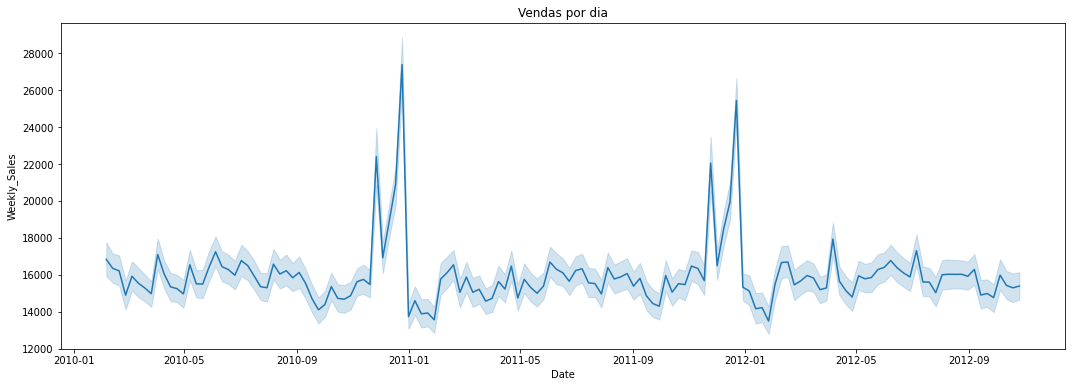

In [ ]:
# Plotando uma relação de Tempo X Venda (Com máximo, mínimo e média entre departamentos e lojas)

plt.figure(figsize=(18,6))
df['Date'] = pd.to_datetime(df['Date'])
sns.lineplot(data=df, x="Date", y="Weekly_Sales")
plt.title('Vendas por dia')
plt.show()

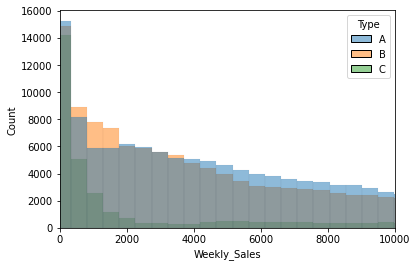

In [ ]:
#plt.figure(figsize=(18,6))
sns.histplot(data=df,x='Weekly_Sales',hue='Type')
plt.xlim([0, 10**4])
plt.show()

In [ ]:
# Tratamento de dados e transformações de categorias (Type,Store e Dept)

df_final = df.copy()
df_final = df_final.fillna(0)
df_final['IsHoliday'] = df_final['IsHoliday'].apply(lambda x:  0 if x == 'False' else 1)
df_final['Date'] = pd.to_datetime(df_final['Date'])

type_colunas = pd.get_dummies(df_final['Type'])
for i in type_colunas.columns:
  df_final['Type_' + i] = type_colunas[i]
df_final.drop('Type',axis=1,inplace=True)

store_colunas = pd.get_dummies(df_final['Store'].astype(str))
for i in store_colunas.columns:
  df_final['Store_' + i] = store_colunas[i]

df_final.drop('Store',axis=1,inplace=True)

dept_colunas = pd.get_dummies(df_final['Dept'].astype(str))
for i in dept_colunas.columns:
  df_final['Dept_' + i] = dept_colunas[i]

df_final.drop('Dept',axis=1,inplace=True)



df_total = df_final.copy()
df_final.sample(5)

,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
265944,2012-07-20,70939.75,1,78.64,3.732,10835.89,164.46,21.51,3314.70,7302.33,...,0,0,0,0,0,0,0,0,0,0
9279,2012-07-27,367.00,1,82.66,3.407,7146.90,389.02,1.59,10267.54,4325.19,...,0,0,0,0,0,0,0,0,0,0
159290,2010-08-06,29136.82,1,70.53,2.802,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
403645,2012-05-18,3798.80,1,72.06,3.630,939.16,0.00,0.00,0.00,1477.98,...,0,0,0,0,0,0,0,0,0,0
321947,2010-06-18,1834.97,1,73.48,2.635,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Devem pedir para que os alunos filtrem o número de examplares (Para uma micro análise)
# Se fizerem com todo o df_final, vão perder MUITO tempo antes de encontrem o melhor modelo

df_final = df_final.sample(1000, random_state = 12345)

In [ ]:
# Separa em Treino X Teste da amostra de 1000

X = df_final[df_final.columns[(df_final.columns != 'Date') & (df_final.columns != 'Weekly_Sales')]]
y =df_final['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)

print(len(X_train))

800


In [ ]:
# Aplica a Normalização (StandardScaler) nos dados (IMPORTANTE QUE NÃO SEJA NOS CATEGÓRICOS)

scaler = StandardScaler()
colunas_scaler =['Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3',
                 'MarkDown4','MarkDown5','CPI','Unemployment','Size']
                 
scaler.fit(X_train[colunas_scaler])
X_train = X_train.reset_index().drop('index',axis=1)
X_test = X_test.reset_index().drop('index',axis=1)
y_train = y_train.reset_index().drop('index',axis=1)
y_test = y_test.reset_index().drop('index',axis=1)


X_train[colunas_scaler] = pd.DataFrame(scaler.transform(X_train[colunas_scaler]),columns=colunas_scaler)
X_train.head()

,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
0,1,0.337515,0.743168,-0.418418,-0.199906,-0.081012,-0.305089,-0.482396,0.605737,0.290542,...,0,0,0,0,0,0,0,0,0,0
1,1,-0.891623,1.172105,-0.418418,-0.199906,-0.081012,-0.305089,-0.482396,-0.888764,0.083402,...,0,0,0,0,0,0,0,0,0,0
2,1,1.160735,-1.683141,-0.418418,-0.199906,-0.081012,-0.305089,-0.482396,1.071074,0.022287,...,1,0,0,0,0,0,0,0,0,0
3,1,0.948291,0.797327,4.381961,-0.194931,-0.074535,0.774487,0.539604,0.561434,0.338677,...,0,0,0,0,0,0,0,0,0,0
4,1,1.195419,0.264405,2.097277,-0.192217,-0.068845,0.891564,0.644437,-0.975840,-2.152959,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test[colunas_scaler] = pd.DataFrame(scaler.transform(X_train[colunas_scaler]),columns=colunas_scaler)
X_test.head()


,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
0,1,-3.295841,-5.655858,-0.418480,-0.199948,-0.081028,-0.305165,-0.482534,-4.288018,-4.200816,...,0,0,0,0,0,0,0,0,0,0
1,1,-3.362454,-4.726632,-0.418480,-0.199948,-0.081028,-0.305165,-0.482534,-4.326051,-4.312845,...,0,0,0,0,0,0,0,0,0,0
2,1,-3.251226,-10.912087,-0.418480,-0.199948,-0.081028,-0.305165,-0.482534,-4.276175,-4.345898,...,0,0,0,0,1,0,0,0,0,0
3,1,-3.262740,-5.538531,-0.417770,-0.199946,-0.081027,-0.304895,-0.482241,-4.289145,-4.174783,...,0,0,0,0,0,0,0,0,0,0
4,1,-3.249347,-6.693025,-0.418108,-0.199946,-0.081026,-0.304866,-0.482211,-4.328267,-5.522352,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Treinamento e validação dos Modelos

models = {
    'LinearReg': LinearRegression(),
    'RidgeReg': Ridge(),
    'LassoReg': Lasso(),
    'ElasticNetReg': ElasticNet(),
    'HuberReg': HuberRegressor(),
    'LassoCV': LassoCV(),
    'ElasticNetCV': ElasticNetCV(),
    'LassoLars': LassoLars(),
    'BayesianRidge': BayesianRidge(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'SVM_RBF':SVR(kernel='rbf'),
    'SVM_POLY':SVR(kernel='poly'),
    'SVM_LINEAR':SVR(kernel='linear',max_iter=10**4),
    'SVM_SIG':SVR(kernel='sigmoid'),
    'SGDRegressor':SGDRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'ExtraTreesRegressor':ExtraTreesRegressor()
}

for model in models.values():
    model.fit(X_train, y_train);

eval = []
nome = []
r2 = []
MAE = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    nome.append(name)
    eval.append(metrics.mean_squared_error(y_test,y_pred))
    r2.append(metrics.r2_score(y_test,y_pred))
    MAE.append(metrics.mean_absolute_error(y_test,y_pred))
    print('-------------------------')
    print(name + ":\n R² : {:.4f}\n MSE: {:.4F}\n MAE: {:.4F}".format(metrics.r2_score(y_test,y_pred),metrics.mean_squared_error(y_test,y_pred),metrics.mean_absolute_error(y_test,y_pred)))
    print('-------------------------')

-------------------------
LinearReg:
 R² : -1181015215592684252037120.0000
 MSE: 647536784630183190943761591959552.0000
 MAE: 23052172101023956.0000
-------------------------
-------------------------
RidgeReg:
 R² : 0.3289
 MSE: 367953900.4777
 MAE: 15084.1240
-------------------------
-------------------------
LassoReg:
 R² : -1.7910
 MSE: 1530295459.0685
 MAE: 36542.3487
-------------------------
-------------------------
ElasticNetReg:
 R² : 0.0355
 MSE: 528828344.8059
 MAE: 14936.5685
-------------------------
-------------------------
HuberReg:
 R² : 0.3267
 MSE: 369147441.5006
 MAE: 12695.0477
-------------------------
-------------------------
LassoCV:
 R² : 0.2110
 MSE: 432587531.0994
 MAE: 17198.3763
-------------------------
-------------------------
ElasticNetCV:
 R² : 0.0060
 MSE: 544983943.1430
 MAE: 15985.0274
-------------------------
-------------------------
LassoLars:
 R² : 0.1250
 MSE: 479756510.9043
 MAE: 18329.7185
-------------------------
-----------------------

In [ ]:
# Tabela de Métricas por Modelo

teste = pd.DataFrame({'Modelo': nome, 'MSE': eval, 'R2': r2, 'MAE':MAE})
teste.nsmallest(18,['MAE'])

,Modelo,MSE,R2,MAE
18,ExtraTreesRegressor,3.067908e+08,0.440457,9784.860679
14,SGDRegressor,2.753382e+08,0.497822,11324.095456
17,GradientBoostingRegressor,3.376772e+08,0.384125,11597.347343
9,DecisionTreeRegressor,4.446236e+08,0.189070,12047.851950
15,RandomForestRegressor,3.305104e+08,0.397196,12254.668129
4,HuberReg,3.691474e+08,0.326727,12695.047695
12,SVM_LINEAR,6.234149e+08,-0.137020,14170.204905
11,SVM_POLY,6.258934e+08,-0.141541,14184.787507
13,SVM_SIG,6.250731e+08,-0.140045,14185.461195
10,SVM_RBF,6.252380e+08,-0.140345,14186.511999


In [ ]:
# Fine Tuning 

parameters = {'loss':['squared_loss','huber'],
               'penalty':['l2', 'l1', 'elasticnet'],
               'alpha':[10**-7,10**-6,10**-4,1, 10, 0.002],
               'l1_ratio':[0.15, 0.3, 0.5],
               'max_iter':[10**3]
        }
reg = GridSearchCV(SGDRegressor(), parameters,n_jobs=-1)
reg.fit(X_train, y_train)

GridSearchCV(estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': [1e-07, 1e-06, 0.0001, 1, 10, 0.002],
                         'l1_ratio': [0.15, 0.3, 0.5],
                         'loss': ['squared_loss', 'huber'], 'max_iter': [1000],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [ ]:
Reg_Best = reg.best_estimator_
Reg_Best

SGDRegressor(alpha=0.002, l1_ratio=0.5, loss='squared_loss',
             penalty='elasticnet')

In [ ]:
# Cálculo das Melhores métricas atingidas no Mini-Case

Reg_Best.fit(X_train,y_train)
y_pred = Reg_Best.predict(X_test)
print('-------------------------')
print(name + ":\n R² : {:.4f}\n MSE: {:.4F}\n MAE: {:.4F}".format(metrics.r2_score(y_test,y_pred),metrics.mean_squared_error(y_test,y_pred),metrics.mean_absolute_error(y_test,y_pred)))
print('-------------------------')

-------------------------
ExtraTreesRegressor:
 R² : 0.5001
 MSE: 274087119.1274
 MAE: 11248.2045
-------------------------


In [ ]:
# Treinamento real em TODA a base (Talvez não de tempo)

df_total = df_total #.sample(10**4)

X = df_total[df_final.columns[(df_final.columns != 'Date') & (df_final.columns != 'Weekly_Sales')]]
y =df_total['Weekly_Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)


scaler = StandardScaler()
colunas_scaler =['Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3',
                 'MarkDown4','MarkDown5','CPI','Unemployment','Size']
scaler.fit(X_train[colunas_scaler])
X_train = X_train.reset_index().drop('index',axis=1)
X_test = X_test.reset_index().drop('index',axis=1)


X_train[colunas_scaler] = pd.DataFrame(scaler.transform(X_train[colunas_scaler]),columns=colunas_scaler)
X_test[colunas_scaler] = pd.DataFrame(scaler.transform(X_test[colunas_scaler]),columns=colunas_scaler)



Reg_Best.fit(X_train,y_train)
y_pred = Reg_Best.predict(X_test)
print('-------------- Melhor Preditor --------------')
print(str(reg.best_estimator_) + ":\n R² : {:.4f}\n MSE: {:.4F}\n MAE: {:.4F}".format(Reg_Best.score(X_test, y_test),metrics.mean_squared_error(y_test,y_pred),metrics.mean_absolute_error(y_test,y_pred)))
print('---------------------------------------------')

-------------- Melhor Preditor --------------
SGDRegressor(alpha=0.002, l1_ratio=0.5, loss='squared_loss',
             penalty='elasticnet'):
 R² : 0.6478
 MSE: 184267408.4320
 MAE: 8085.5441
---------------------------------------------


In [ ]:
# Criando uma tabela com todos os valores e seus preditores

df_total_final = df_total.copy()
df_total[colunas_scaler] = pd.DataFrame(scaler.transform(df_total[colunas_scaler]),columns=colunas_scaler)
df_total_final['Previsto'] = Reg_Best.predict(df_total[df_final.columns[(df_final.columns != 'Date') & (df_final.columns != 'Weekly_Sales')]])
df_total_final.head()

,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Previsto
0,2010-02-05,24924.50,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,25962.221963
1,2010-02-05,50605.27,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,48878.177804
2,2010-02-05,13740.12,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,18957.500698
3,2010-02-05,39954.04,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,32312.060051
4,2010-02-05,32229.38,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,27864.968660


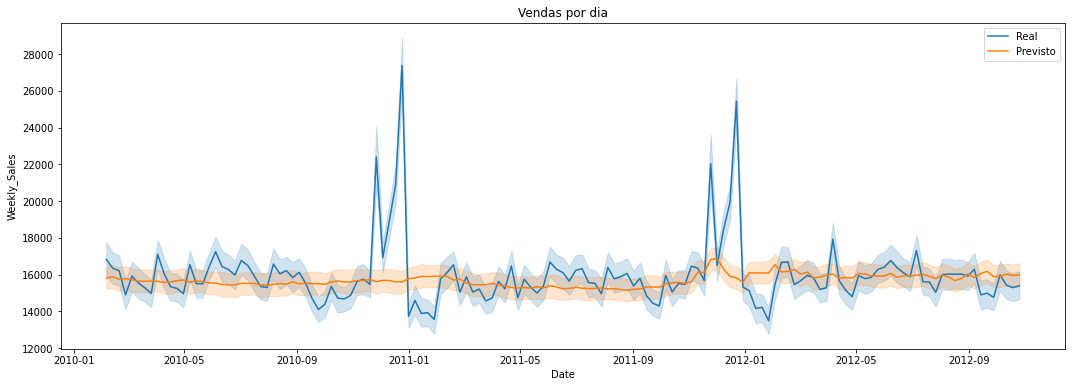

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_total_final, x="Date", y="Weekly_Sales",label='Real')
sns.lineplot(data=df_total_final, x="Date", y="Previsto",label='Previsto')
plt.title('Vendas por dia')
plt.show()